## Installing some important libaries 

<h3>The list and their usage of libraies </h3>
<ul>
    <li>Tensorflow:- For using data flow graphs to build models and transfer learning </li>
    <li> Os:- For using the files and interect with os </li>
    <li>Matplotlib :- For Displaying images and plottings</li>
    <li>Keras :- For  for creating deep models  and Keras is also used for distributed training of deep learning models </li>
   
</ul>

In [1]:
!pip install --upgrade tensorflow 
!pip install --upgrade matplotlib 


     |████████████████████████████████| 578.0 MB 12 kB/s s eta 0:00:01  |                                | 1.1 MB 2.1 MB/s eta 0:04:35     |█▍                              | 25.3 MB 2.1 MB/s eta 0:04:23     |█████                           | 89.1 MB 59.4 MB/s eta 0:00:09     |████████████████▉               | 304.9 MB 57.1 MB/s eta 0:00:05     |███████████████████████████████▊| 573.7 MB 64.4 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 49.6 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 51.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 43.3 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 51.0 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 46.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 49.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 43.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19

<h2> Importing Libaries </h3>

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

<font size=60px color='red'>Importing images and creating dataset </font>

In [2]:
train_dir='../input/cotton-disease-dataset/Cotton Disease/train' #The directoery path of train dataset
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(224,224))


Found 1951 files belonging to 4 classes.


2022-11-10 09:01:02.505678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 09:01:02.506598: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 09:01:02.641572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 09:01:02.642424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 09:01:02.643249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [3]:
val_dir='../input/cotton-disease-dataset/Cotton Disease/val' #The directoery path of val dataset
val_ds=tf.keras.preprocessing.image_dataset_from_directory(val_dir,image_size=(224,224))


Found 253 files belonging to 4 classes.


<h3> Seeing the all the class names of Dataset </h3>

In [4]:
class_names=train_ds.class_names
print('There are total {} classes are as below'.format(len(class_names)))
print(class_names)

There are total 4 classes are as below
['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']


# Seeing images of dataset

2022-11-10 09:01:13.293745: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


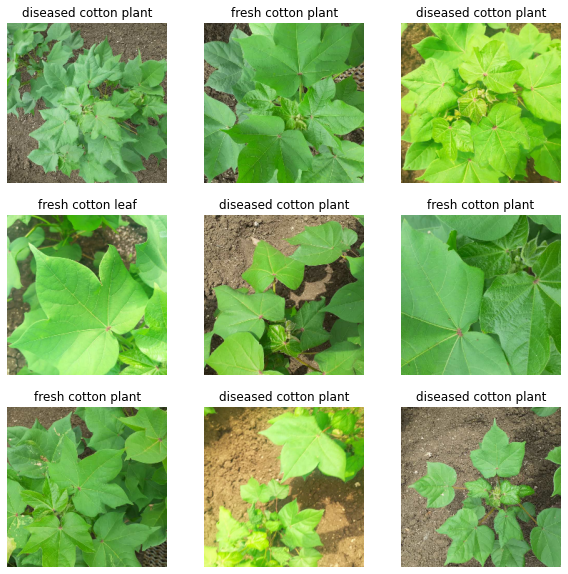

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.savefig(str(class_names[labels[i]])+"png")
    plt.axis("off")

### Preprocess Dataset
Here, I'll perform normalization on images in training and validation set. 
- I'll use the function [preprocess_input](https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py) from the ResNet50 model in Keras.

In [22]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_ims


<font size=50px > here we Go for Model Creation </font>

<ul>
    <li> Here I am using the concept of transer learning </li>
    <li> Here I am using <a herf='https://keras.io/api/applications/resnet/'>Resnet50 model</a> and the weights of ImageNet Model  
        <li> Here I am using functional API from tensorflow , You can also use Sequnaital API to make model</li>
</ul>

## Define the Network
I shall be performing transfer learning on **ResNet50** available in Keras.
- I shall load pre-trained **imagenet weights** to the model.
- I shall choose to retain all layers of **ResNet50** along with the final classification layers.

In [21]:
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
Input size is 224 x 224.
'''
def feature_extractor(inputs):

  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)
  return feature_extractor


In [23]:
'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

In [24]:
def final_model(inputs):

    #resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_feature_extractor = feature_extractor(inputs)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

In [25]:
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(224,224,3))
  
  classification_output = final_model(inputs) 
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
 
  model.compile(optimizer='SGD', 
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [26]:
model = define_compile_model()


94781440/94765736 [==============================] - 1s 0us/step


# Seeing Model Summary :)

In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
classification (Dense)       (None, 10)                5130

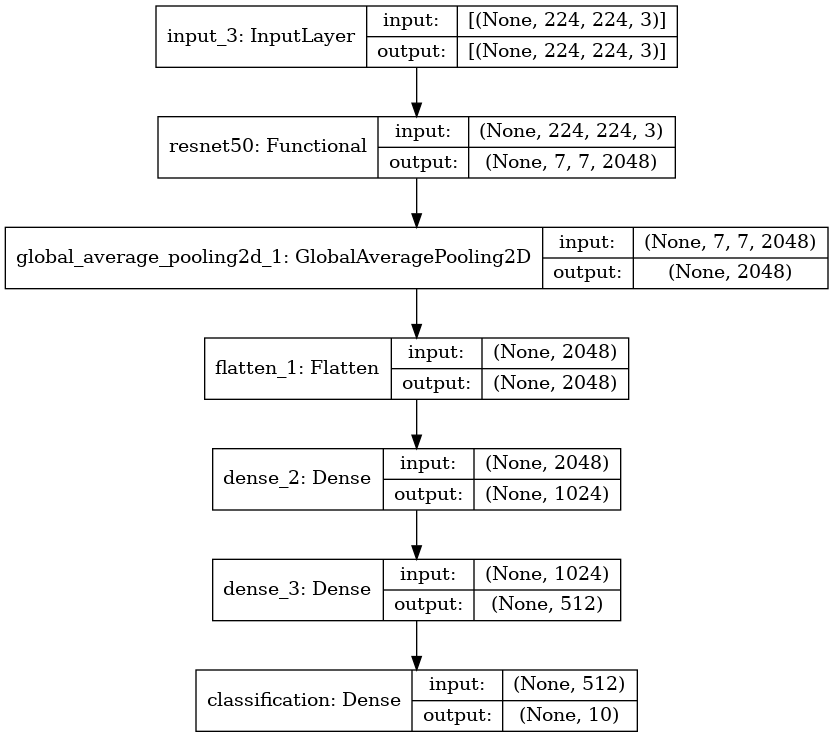

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Callbacks

In [30]:
callbacks = [tf.keras.callbacks.ModelCheckpoint("Resnet50.h5",monitor="val_accuracy",save_best_only=True),
             tf.keras.callbacks.TensorBoard(log_dir="logs"),tf.keras.callbacks.CSVLogger("ResNet50.log",separator=",",append=True)]

2022-11-10 09:25:18.917524: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-10 09:25:18.917618: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-10 09:25:19.589968: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-10 09:25:19.590188: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


## Now train and validate model on training and validation dataset

In [31]:
history=model.fit(train_ds,validation_data=val_ds,epochs=30,callbacks=callbacks)

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/30
 1/61 [..............................] - ETA: 6:33 - loss: 2.5861 - accuracy: 0.0000e+00

2022-11-10 09:25:28.276208: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-10 09:25:28.276258: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/61 [..............................] - ETA: 48s - loss: 2.3032 - accuracy: 0.2344     

2022-11-10 09:25:30.063165: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-10 09:25:30.067406: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-11-10 09:25:30.238850: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 1452 callback api events and 1449 activity events. 
2022-11-10 09:25:30.288981: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-10 09:25:30.338796: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_11_10_09_25_30

2022-11-10 09:25:30.375034: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_11_10_09_25_30/8914ab4843ab.trace.json.gz
2022-11-10 09:25:30.445143: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/pl

61/61 [==============================] - 33s 436ms/step - loss: 0.4925 - accuracy: 0.8662 - val_loss: 0.3863 - val_accuracy: 0.8419
Epoch 2/30
61/61 [==============================] - 22s 354ms/step - loss: 0.0577 - accuracy: 0.9892 - val_loss: 0.1077 - val_accuracy: 0.9684
Epoch 3/30
61/61 [==============================] - 22s 344ms/step - loss: 0.0227 - accuracy: 0.9979 - val_loss: 0.0431 - val_accuracy: 0.9881
Epoch 4/30
61/61 [==============================] - 22s 351ms/step - loss: 0.0137 - accuracy: 0.9995 - val_loss: 0.0401 - val_accuracy: 0.9921
Epoch 5/30
61/61 [==============================] - 22s 345ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.0345 - val_accuracy: 0.9921
Epoch 6/30
61/61 [==============================] - 21s 342ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0329 - val_accuracy: 0.9881
Epoch 7/30
61/61 [==============================] - 22s 342ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0332 - val_accuracy: 0.9960
Epoch 8/30

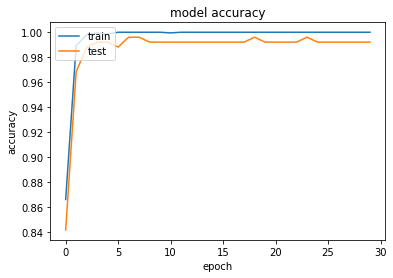

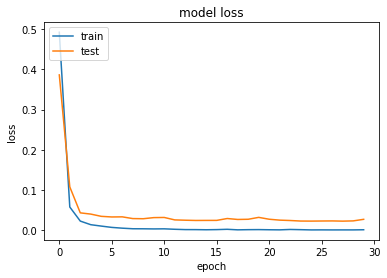

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Model Accuracy")
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("Model Loss")
plt.show()


In [33]:
model = tf.keras.models.load_model("Resnet50.h5")

## let's evaluate model on test set 

In [34]:
test_dir='../input/cotton-disease-dataset/Cotton Disease/test' #The directoery path of test dataset
test_ds=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=(224,224))


Found 106 files belonging to 4 classes.


In [35]:
model.evaluate(test_ds)

4/4 [==============================] - 3s 236ms/step - loss: 0.0174 - accuracy: 1.0000


[0.01739460974931717, 1.0]

In [ ]:
predictions=model.predict(test_ds)

In [36]:
!tar -zcvf Cotton_disease.tar.gz /kaggle/working


tar: Removing leading `/' from member names
/kaggle/working/
/kaggle/working/__notebook_source__.ipynb
/kaggle/working/Model Loss.png
/kaggle/working/logs/
/kaggle/working/logs/validation/
/kaggle/working/logs/validation/events.out.tfevents.1668072351.8914ab4843ab.18.3.v2
/kaggle/working/logs/validation/events.out.tfevents.1668070969.8914ab4843ab.18.1.v2
/kaggle/working/logs/train/
/kaggle/working/logs/train/plugins/
/kaggle/working/logs/train/plugins/profile/
/kaggle/working/logs/train/plugins/profile/2022_11_10_09_25_30/
/kaggle/working/logs/train/plugins/profile/2022_11_10_09_25_30/8914ab4843ab.trace.json.gz
/kaggle/working/logs/train/plugins/profile/2022_11_10_09_25_30/8914ab4843ab.input_pipeline.pb
/kaggle/working/logs/train/plugins/profile/2022_11_10_09_25_30/8914ab4843ab.overview_page.pb
/kaggle/working/logs/train/plugins/profile/2022_11_10_09_25_30/8914ab4843ab.xplane.pb
/kaggle/working/logs/train/plugins/profile/2022_11_10_09_25_30/8914ab4843ab.kernel_stats.pb
/kaggle/working/

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.savefig(str(class_names[labels[i]])+"png")
    plt.axis("off")

## It gives <b> 100% </b> Accuracy on test set
# Please Upvote it if you like it ad feel free to suggest you changes 